In [ ]:
# Luisa Cristina dos Santos Neves - rm551889

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Usando cojunto de colunas correspondentes ao final do rm 


df_all= pd.read_csv('CP6 HeartDisease.csv')

df = df_all[['HeartDisease', 'MentalHealth', 'SleepTime', 'PhysicalActivity', 'Asthma', 'KidneyDisease']]


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   MentalHealth      319795 non-null  float64
 2   SleepTime         319795 non-null  float64
 3   PhysicalActivity  319795 non-null  object 
 4   Asthma            319795 non-null  object 
 5   KidneyDisease     319795 non-null  object 
dtypes: float64(2), object(4)
memory usage: 14.6+ MB
None


In [14]:
#Formatação de Váriaveis

df_dummies = pd.get_dummies(df, columns=['MentalHealth', 'PhysicalActivity', 'Asthma', 'KidneyDisease'], dtype='int', drop_first=True)


print(df_dummies.head())# primeiras linhas
print(df_dummies.tail())# ultimas linhas


  HeartDisease  SleepTime  MentalHealth_1.0  MentalHealth_2.0  \
0           No        5.0                 0                 0   
1           No        7.0                 0                 0   
2           No        8.0                 0                 0   
3           No        6.0                 0                 0   
4           No        8.0                 0                 0   

   MentalHealth_3.0  MentalHealth_4.0  MentalHealth_5.0  MentalHealth_6.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   MentalHealth_7.0  MentalHealth_8.0  ...  MentalHealth_24.0  \
0                 0                 0  ...                  0   
1               

In [15]:
# Modelo Logit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


df['HeartDisease'] = LabelEncoder().fit_transform(df['HeartDisease'])  
y = df['HeartDisease']

X = df_dummies.drop(columns=['HeartDisease'])#usando o df_dummies que criei lá em cima


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logit_model = LogisticRegression(random_state=42)
logit_model.fit(X_train_scaled, y_train)


y_pred = logit_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, f1, conf_matrix


print("Acurácia:", accuracy)
print("F1-Score:", f1)
print("Matriz de Confusão:\n", conf_matrix)

# Acurácia: 0.9143982864022264
# F1-Score: 0.003276897870016385
# Matriz de Confusão:
#  [[58475     9]
#  [ 5466     9]]

C:\Users\user\AppData\Local\Temp\ipykernel_3000\4119147434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDisease'] = LabelEncoder().fit_transform(df['HeartDisease'])


Acurácia: 0.9143982864022264
F1-Score: 0.003276897870016385
Matriz de Confusão:
 [[58475     9]
 [ 5466     9]]


Acurácia: 0.9139
F1-Score: 0.0147
Matriz de Confusão:
[[58408    76]
 [ 5434    41]]


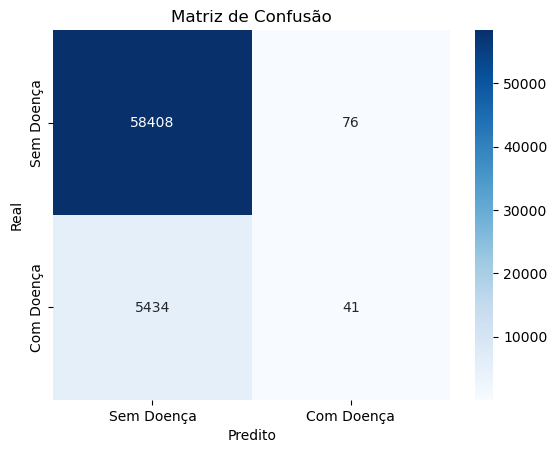

In [20]:
# Modelo de Árvore de Decisão

from pyexpat import model
from sklearn.tree import DecisionTreeClassifier


X = df_dummies.drop(columns=['HeartDisease'])  
y = df['HeartDisease']              


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')


f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)



sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Acurácia: 0.9139
# F1-Score: 0.0147
# Matriz de Confusão:
# [[58408    76]
#  [ 5434    41]]


In [27]:
#Modelo KNN

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Dados de entrada
X = df_dummies.drop(columns=['HeartDisease'])    
y = df['HeartDisease']  

# Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Padronizar as variáveis independentes (X_train e X_test) usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo KNN (usando 5 vizinhos como exemplo)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# 1. Calcular a Acurácia
acuracia = accuracy_score(y_test, y_pred)

# 2. Calcular o F1-Score
f1 = f1_score(y_test, y_pred)

# 3. Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# 4. Calcular a Área Sob a Curva ROC (AUC-ROC)
# Para calcular o AUC-ROC, usamos as previsões de probabilidade do modelo
y_prob = model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Acurácia: {acuracia:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)
print(f"AUC-ROC: {auc_roc:.4f}")

# Acurácia: 0.9118
# F1-Score: 0.0362
# Matriz de Confusão:
# [[58212   272]
#  [ 5369   106]]
# AUC-ROC: 0.5415

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Acurácia: 0.9118
F1-Score: 0.0362
Matriz de Confusão:
[[58212   272]
 [ 5369   106]]
AUC-ROC: 0.5415


In [28]:
# Previsão
import pandas as pd
from sklearn.preprocessing import StandardScaler


dados_pacientes = pd.DataFrame([
    [2, 8,  1,  0, 0],  # Paciente 1
    [8, 8, 0, 1, 1]   # Paciente 2
], columns=['MentalHealth', 'SleepTime', 'PhysicalActivity', 'Asthma', 'KidneyDisease'])


dados_pacientes_dummies = pd.get_dummies(dados_pacientes)


for col in X.columns:
    if col not in dados_pacientes_dummies.columns:
        dados_pacientes_dummies[col] = 0


dados_pacientes_dummies = dados_pacientes_dummies[X.columns]


dados_pacientes_scaled = scaler.transform(dados_pacientes_dummies)


classificacao = model.predict(dados_pacientes_scaled)
probabilidade = model.predict_proba(dados_pacientes_scaled)[:, 1]  


for i, (classe, prob) in enumerate(zip(classificacao, probabilidade)):
    print(f"Paciente {i+1} - Classificação: {'Doença Cardíaca' if classe == 1 else 'Sem Doença Cardíaca'}, Probabilidade: {prob:.4f}")


# Paciente 1 - Classificação: Sem Doença Cardíaca, Probabilidade: 0.0000
# Paciente 2 - Classificação: Sem Doença Cardíaca, Probabilidade: 0.0000


Paciente 1 - Classificação: Sem Doença Cardíaca, Probabilidade: 0.0000
Paciente 2 - Classificação: Sem Doença Cardíaca, Probabilidade: 0.0000


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
